In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('questions.csv')

In [5]:
new_df = df.sample(30000,random_state=20)

In [7]:
new_df.head()

id    qid1    qid2  \
67050    67050  133306  133307   
156722  156722  309930  309931   
318365  318365  624667  624668   
225123  225123  443700  443701   
256584  256584  505029  505030   

                                                question1  \
67050   How much black money would be recovered in 201...   
156722                   Does a magnetic field have mass?   
318365  Why has Dhoni left the captaincy from ODI and ...   
225123  Where can I get best assistance in Sydney for ...   
256584  As a web developer how can I contribute to ope...   

                                                question2  is_duplicate  
67050   How much black money has been recovered after ...             0  
156722  Can we increase the mass of an electron accele...             0  
318365   Why did M.S.Dhoni left captaincy from ODI & T20?             1  
225123  Where can I get highest quality service at exc...             1  
256584                     How do I contribute on GitHub?             1

In [9]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q

In [11]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

In [13]:
df.head()

id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  
2  How can Internet speed be increased by hacking...             0  
3  Find the remainder when [math]23^{24}[/math] i...             0  
4            Which fish would survive in salt water?             0

In [15]:
new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

id    qid1    qid2  \
67050    67050  133306  133307   
156722  156722  309930  309931   
318365  318365  624667  624668   
225123  225123  443700  443701   
256584  256584  505029  505030   

                                                question1  \
67050   how much black money would be recovered in 201...   
156722                    does a magnetic field have mass   
318365  why has dhoni left the captaincy from odi and t20   
225123  where can i get best assistance in sydney for ...   
256584  as a web developer how can i contribute to ope...   

                                                question2  is_duplicate  \
67050   how much black money has been recovered after ...             0   
156722  can we increase the mass of an electron accele...             0   
318365    why did m s dhoni left captaincy from odi   t20             1   
225123  where can i get highest quality service at exc...             1   
256584                      how do i contribute on github             1   

        q1_len  q2_len  q1_num_words  q2_num_words  
67050       68     100            11            20  
156722      31     119             6            21  
318365      49      47            10            12  
225123      69      97            12            15  
256584      64      29            13             6

In [17]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

id    qid1    qid2  \
67050    67050  133306  133307   
156722  156722  309930  309931   
318365  318365  624667  624668   
225123  225123  443700  443701   
256584  256584  505029  505030   

                                                question1  \
67050   how much black money would be recovered in 201...   
156722                    does a magnetic field have mass   
318365  why has dhoni left the captaincy from odi and t20   
225123  where can i get best assistance in sydney for ...   
256584  as a web developer how can i contribute to ope...   

                                                question2  is_duplicate  \
67050   how much black money has been recovered after ...             0   
156722  can we increase the mass of an electron accele...             0   
318365    why did m s dhoni left captaincy from odi   t20             1   
225123  where can i get highest quality service at exc...             1   
256584                      how do i contribute on github             1   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  
67050       68     100            11            20            6  
156722      31     119             6            21            4  
318365      49      47            10            12            7  
225123      69      97            12            15            8  
256584      64      29            13             6            5

In [19]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))


new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

id    qid1    qid2  \
67050    67050  133306  133307   
156722  156722  309930  309931   
318365  318365  624667  624668   
225123  225123  443700  443701   
256584  256584  505029  505030   

                                                question1  \
67050   how much black money would be recovered in 201...   
156722                    does a magnetic field have mass   
318365  why has dhoni left the captaincy from odi and t20   
225123  where can i get best assistance in sydney for ...   
256584  as a web developer how can i contribute to ope...   

                                                question2  is_duplicate  \
67050   how much black money has been recovered after ...             0   
156722  can we increase the mass of an electron accele...             0   
318365    why did m s dhoni left captaincy from odi   t20             1   
225123  where can i get highest quality service at exc...             1   
256584                      how do i contribute on github             1   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  word_total  
67050       68     100            11            20            6          31  
156722      31     119             6            21            4          25  
318365      49      47            10            12            7          21  
225123      69      97            12            15            8          27  
256584      64      29            13             6            5          19

In [21]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

id    qid1    qid2  \
67050    67050  133306  133307   
156722  156722  309930  309931   
318365  318365  624667  624668   
225123  225123  443700  443701   
256584  256584  505029  505030   

                                                question1  \
67050   how much black money would be recovered in 201...   
156722                    does a magnetic field have mass   
318365  why has dhoni left the captaincy from odi and t20   
225123  where can i get best assistance in sydney for ...   
256584  as a web developer how can i contribute to ope...   

                                                question2  is_duplicate  \
67050   how much black money has been recovered after ...             0   
156722  can we increase the mass of an electron accele...             0   
318365    why did m s dhoni left captaincy from odi   t20             1   
225123  where can i get highest quality service at exc...             1   
256584                      how do i contribute on github             1   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  word_total  \
67050       68     100            11            20            6          31   
156722      31     119             6            21            4          25   
318365      49      47            10            12            7          21   
225123      69      97            12            15            8          27   
256584      64      29            13             6            5          19   

        word_share  
67050         0.19  
156722        0.16  
318365        0.33  
225123        0.30  
256584        0.26

In [23]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [24]:
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [27]:
new_df.head()

id    qid1    qid2  \
67050    67050  133306  133307   
156722  156722  309930  309931   
318365  318365  624667  624668   
225123  225123  443700  443701   
256584  256584  505029  505030   

                                                question1  \
67050   how much black money would be recovered in 201...   
156722                    does a magnetic field have mass   
318365  why has dhoni left the captaincy from odi and t20   
225123  where can i get best assistance in sydney for ...   
256584  as a web developer how can i contribute to ope...   

                                                question2  is_duplicate  \
67050   how much black money has been recovered after ...             0   
156722  can we increase the mass of an electron accele...             0   
318365    why did m s dhoni left captaincy from odi   t20             1   
225123  where can i get highest quality service at exc...             1   
256584                      how do i contribute on github             1   

        q1_len  q2_len  q1_num_words  q2_num_words  ...  word_total  \
67050       68     100            11            20  ...          31   
156722      31     119             6            21  ...          25   
318365      49      47            10            12  ...          21   
225123      69      97            12            15  ...          27   
256584      64      29            13             6  ...          19   

        word_share   cwc_min   cwc_max   csc_min   csc_max   ctc_min  \
67050         0.19  0.571420  0.363633  0.499988  0.249997  0.545450   
156722        0.16  0.999967  0.299997  0.333322  0.124998  0.666656   
318365        0.33  0.999980  0.999980  0.399992  0.399992  0.699993   
225123        0.30  0.499992  0.333330  0.833319  0.833319  0.666661   
256584        0.26  0.999950  0.333328  0.749981  0.428565  0.833319   

         ctc_max  last_word_eq  first_word_eq  
67050   0.315788           0.0            1.0  
156722  0.199999           0.0            0.0  
318365  0.699993           1.0            1.0  
225123  0.533330           0.0            1.0  
256584  0.384612           1.0            0.0  

[5 rows x 21 columns]

In [29]:
import distance

def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [31]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [33]:
new_df.head()

id    qid1    qid2  \
67050    67050  133306  133307   
156722  156722  309930  309931   
318365  318365  624667  624668   
225123  225123  443700  443701   
256584  256584  505029  505030   

                                                question1  \
67050   how much black money would be recovered in 201...   
156722                    does a magnetic field have mass   
318365  why has dhoni left the captaincy from odi and t20   
225123  where can i get best assistance in sydney for ...   
256584  as a web developer how can i contribute to ope...   

                                                question2  is_duplicate  \
67050   how much black money has been recovered after ...             0   
156722  can we increase the mass of an electron accele...             0   
318365    why did m s dhoni left captaincy from odi   t20             1   
225123  where can i get highest quality service at exc...             1   
256584                      how do i contribute on github             1   

        q1_len  q2_len  q1_num_words  q2_num_words  ...   cwc_max   csc_min  \
67050       68     100            11            20  ...  0.363633  0.499988   
156722      31     119             6            21  ...  0.299997  0.333322   
318365      49      47            10            12  ...  0.999980  0.399992   
225123      69      97            12            15  ...  0.333330  0.833319   
256584      64      29            13             6  ...  0.333328  0.749981   

         csc_max   ctc_min   ctc_max  last_word_eq  first_word_eq  \
67050   0.249997  0.545450  0.315788           0.0            1.0   
156722  0.124998  0.666656  0.199999           0.0            0.0   
318365  0.399992  0.699993  0.699993           1.0            1.0   
225123  0.833319  0.666661  0.533330           0.0            1.0   
256584  0.428565  0.833319  0.384612           1.0            0.0   

        abs_len_diff  mean_len  longest_substr_ratio  
67050            8.0      15.0              0.304348  
156722          14.0      13.0              0.468750  
318365           0.0      10.0              0.416667  
225123           3.0      13.5              0.228571  
256584           7.0       9.5              0.466667  

[5 rows x 24 columns]

In [35]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [37]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

print(new_df.shape)
new_df.head()

(30000, 28)


id    qid1    qid2  \
67050    67050  133306  133307   
156722  156722  309930  309931   
318365  318365  624667  624668   
225123  225123  443700  443701   
256584  256584  505029  505030   

                                                question1  \
67050   how much black money would be recovered in 201...   
156722                    does a magnetic field have mass   
318365  why has dhoni left the captaincy from odi and t20   
225123  where can i get best assistance in sydney for ...   
256584  as a web developer how can i contribute to ope...   

                                                question2  is_duplicate  \
67050   how much black money has been recovered after ...             0   
156722  can we increase the mass of an electron accele...             0   
318365    why did m s dhoni left captaincy from odi   t20             1   
225123  where can i get highest quality service at exc...             1   
256584                      how do i contribute on github             1   

        q1_len  q2_len  q1_num_words  q2_num_words  ...   ctc_max  \
67050       68     100            11            20  ...  0.315788   
156722      31     119             6            21  ...  0.199999   
318365      49      47            10            12  ...  0.699993   
225123      69      97            12            15  ...  0.533330   
256584      64      29            13             6  ...  0.384612   

        last_word_eq  first_word_eq  abs_len_diff  mean_len  \
67050            0.0            1.0           8.0      15.0   
156722           0.0            0.0          14.0      13.0   
318365           1.0            1.0           0.0      10.0   
225123           0.0            1.0           3.0      13.5   
256584           1.0            0.0           7.0       9.5   

        longest_substr_ratio  fuzz_ratio  fuzz_partial_ratio  \
67050               0.304348          64                  79   
156722              0.468750          25                  65   
318365              0.416667          83                  81   
225123              0.228571          65                  56   
256584              0.466667          58                  72   

        token_sort_ratio  token_set_ratio  
67050                 72               74  
156722                38               81  
318365                79               90  
225123                54               71  
256584                62               95  

[5 rows x 28 columns]

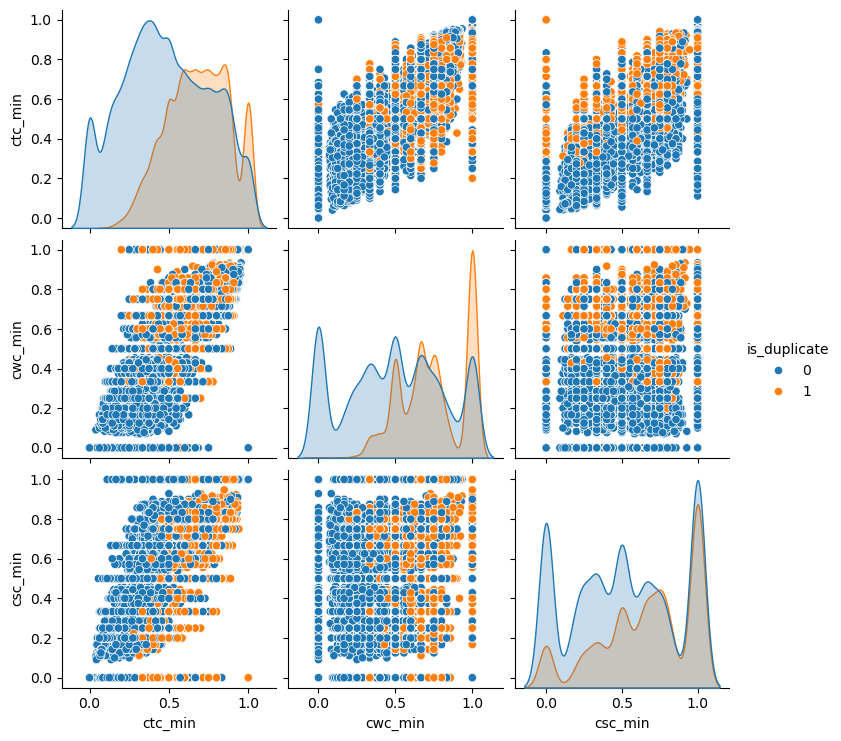

In [39]:
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

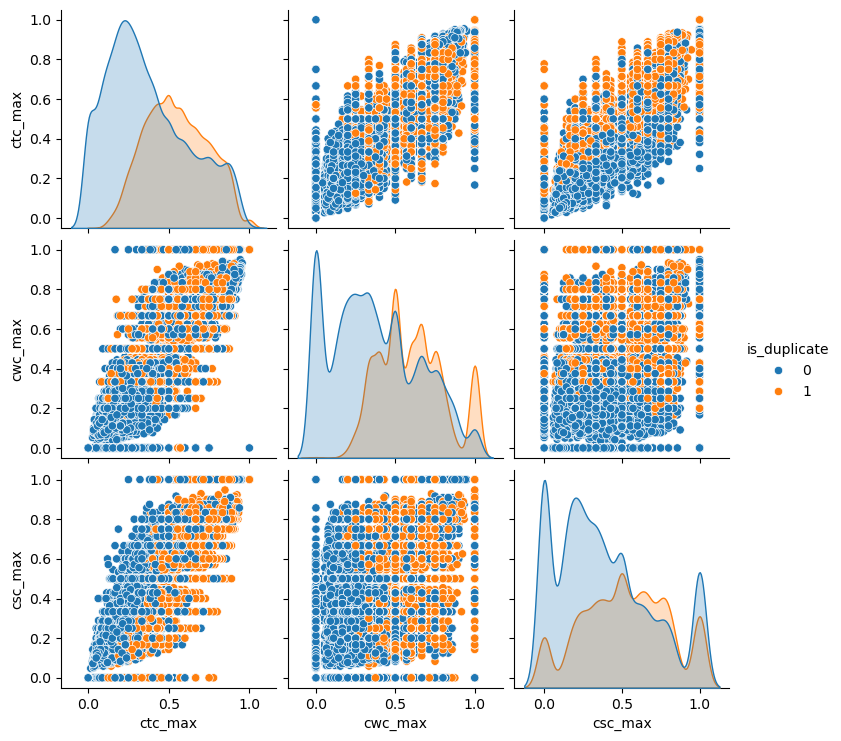

In [40]:
sns.pairplot(new_df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')

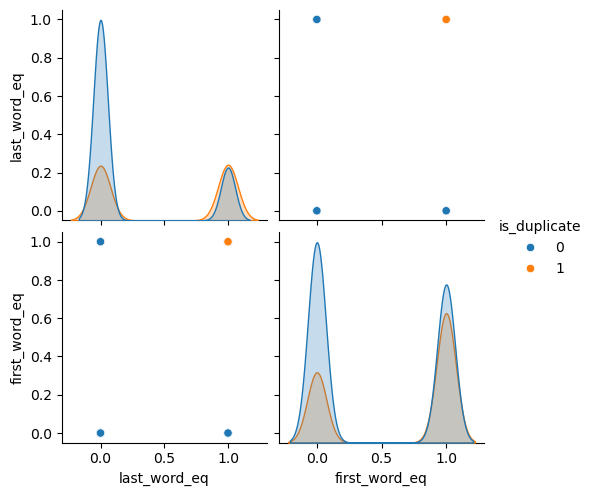

In [42]:
sns.pairplot(new_df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')

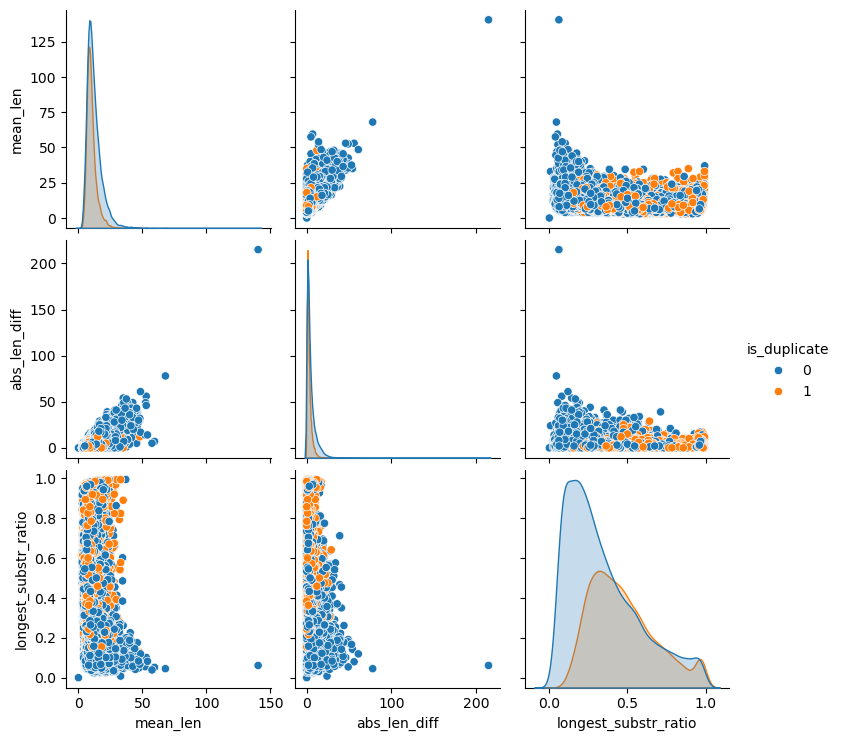

In [44]:
sns.pairplot(new_df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')

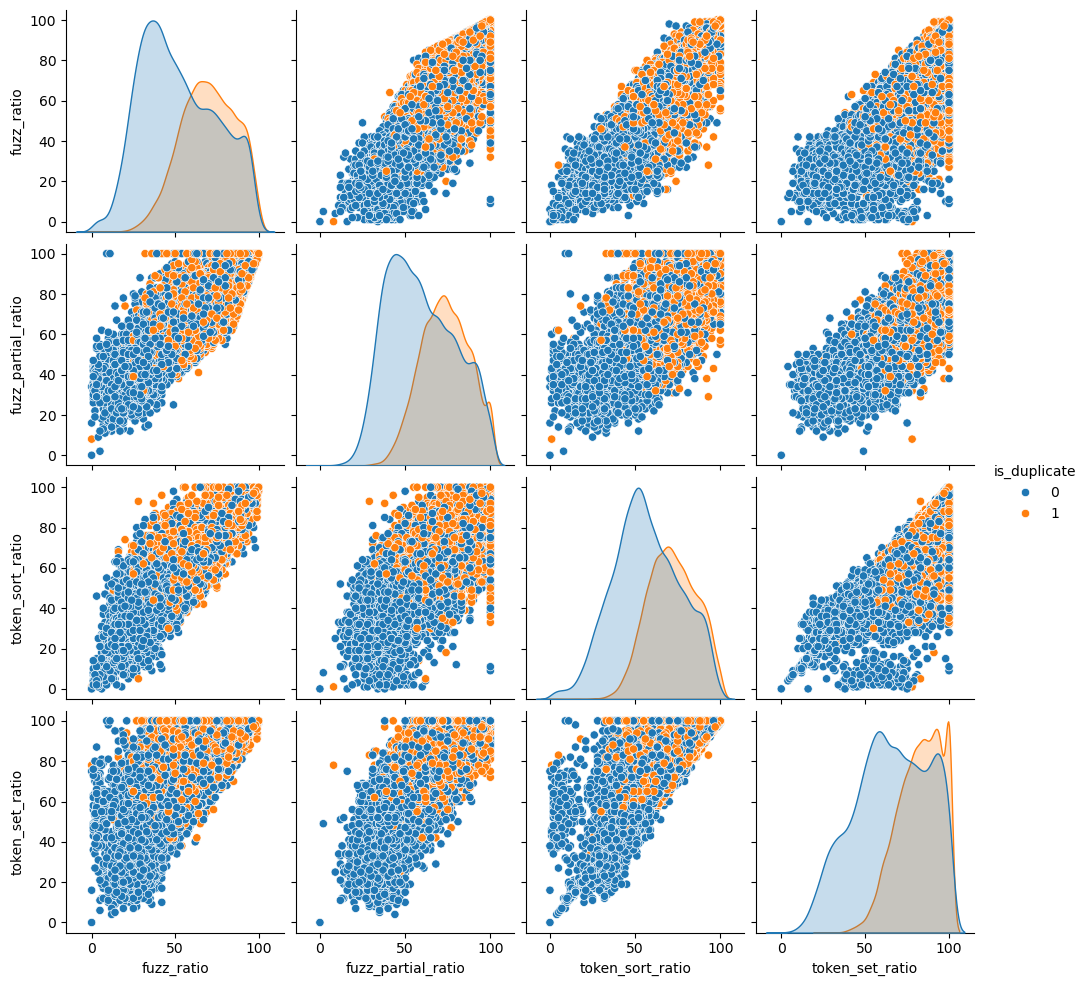

In [46]:
sns.pairplot(new_df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')

In [49]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(new_df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = new_df['is_duplicate'].values

In [51]:
from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.069s...
[t-SNE] Computed neighbors for 30000 samples in 6.062s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sam

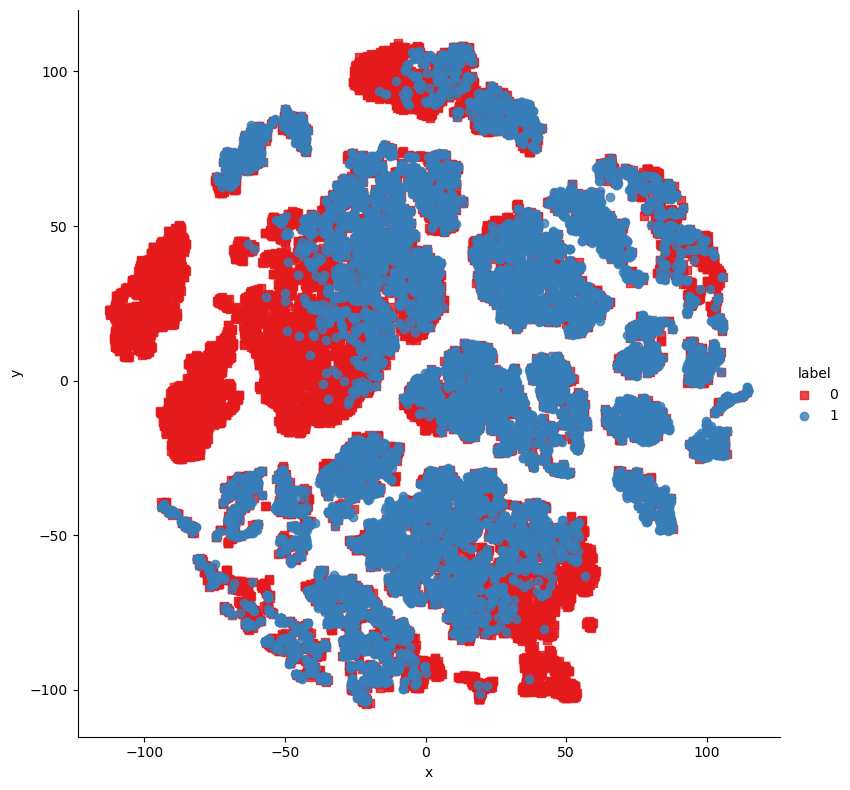

In [55]:
x_df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False, height=8,palette="Set1",markers=['s','o'])

In [57]:
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.060s...
[t-SNE] Computed neighbors for 30000 samples in 4.312s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sam

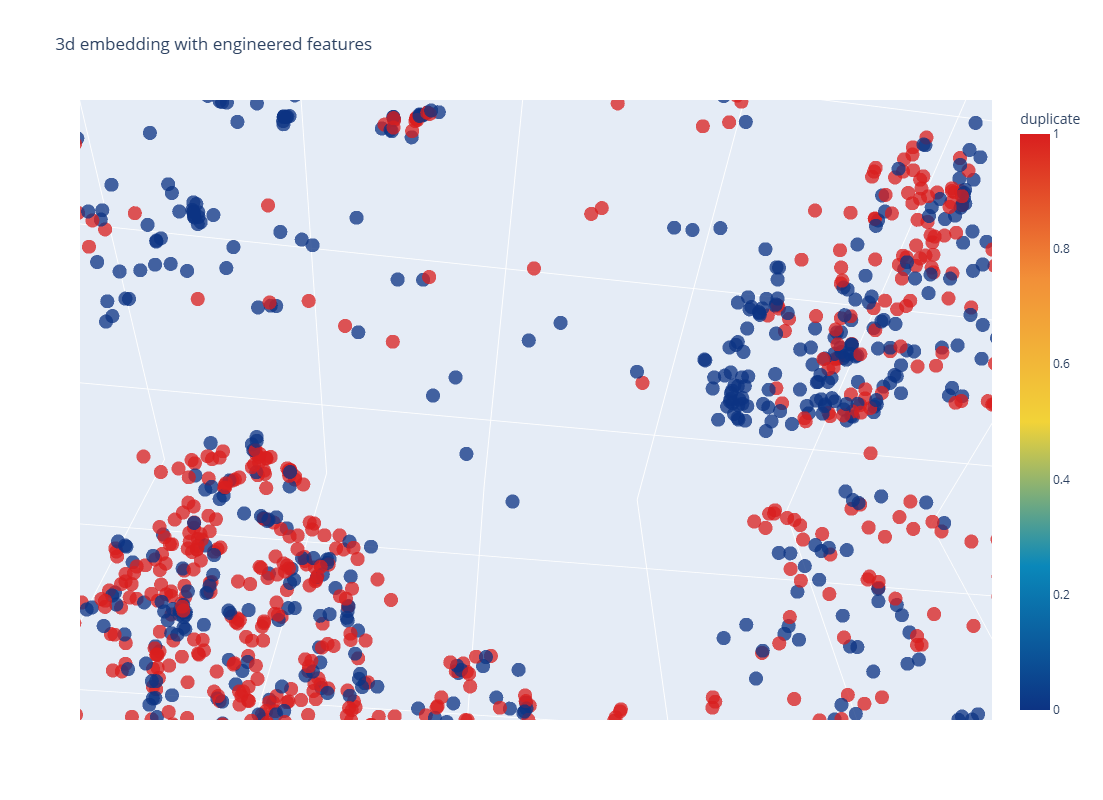

In [59]:
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)

trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

In [39]:
ques_df = new_df[['question1','question2']]
ques_df.head()

question1  \
67050   how much black money would be recovered in 201...   
156722                    does a magnetic field have mass   
318365  why has dhoni left the captaincy from odi and t20   
225123  where can i get best assistance in sydney for ...   
256584  as a web developer how can i contribute to ope...   

                                                question2  
67050   how much black money has been recovered after ...  
156722  can we increase the mass of an electron accele...  
318365    why did m s dhoni left captaincy from odi   t20  
225123  where can i get highest quality service at exc...  
256584                      how do i contribute on github

In [41]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 23)


is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  word_common  \
67050              0      68     100            11            20            6   
156722             0      31     119             6            21            4   
318365             1      49      47            10            12            7   
225123             1      69      97            12            15            8   
256584             1      64      29            13             6            5   

        word_total  word_share   cwc_min   cwc_max  ...   ctc_max  \
67050           31        0.19  0.571420  0.363633  ...  0.315788   
156722          25        0.16  0.999967  0.299997  ...  0.199999   
318365          21        0.33  0.999980  0.999980  ...  0.699993   
225123          27        0.30  0.499992  0.333330  ...  0.533330   
256584          19        0.26  0.999950  0.333328  ...  0.384612   

        last_word_eq  first_word_eq  abs_len_diff  mean_len  \
67050            0.0            1.0           8.0      15.0   
156722           0.0            0.0          14.0      13.0   
318365           1.0            1.0           0.0      10.0   
225123           0.0            1.0           3.0      13.5   
256584           1.0            0.0           7.0       9.5   

        longest_substr_ratio  fuzz_ratio  fuzz_partial_ratio  \
67050               0.304348          64                  79   
156722              0.468750          25                  65   
318365              0.416667          83                  81   
225123              0.228571          65                  56   
256584              0.466667          58                  72   

        token_sort_ratio  token_set_ratio  
67050                 72               74  
156722                38               81  
318365                79               90  
225123                54               71  
256584                62               95  

[5 rows x 23 columns]

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)


temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [45]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6023)


is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  word_common  \
67050              0      68     100            11            20            6   
156722             0      31     119             6            21            4   
318365             1      49      47            10            12            7   
225123             1      69      97            12            15            8   
256584             1      64      29            13             6            5   

        word_total  word_share   cwc_min   cwc_max  ...  2990  2991  2992  \
67050           31        0.19  0.571420  0.363633  ...     0     0     0   
156722          25        0.16  0.999967  0.299997  ...     0     0     0   
318365          21        0.33  0.999980  0.999980  ...     0     0     0   
225123          27        0.30  0.499992  0.333330  ...     0     0     0   
256584          19        0.26  0.999950  0.333328  ...     0     0     0   

        2993  2994  2995  2996  2997  2998  2999  
67050      0     0     0     0     0     0     0  
156722     0     0     0     0     0     0     0  
318365     0     0     0     0     0     0     0  
225123     0     0     0     0     0     0     0  
256584     0     0     0     0     0     0     0  

[5 rows x 6023 columns]

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7763333333333333

In [108]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

0.78

In [76]:
from sklearn.metrics import confusion_matrix

In [78]:
# for random forest model
confusion_matrix(y_test,y_pred)

array([[3162,  580],
       [ 762, 1496]], dtype=int64)

In [110]:
# for xgboost model
confusion_matrix(y_test,y_pred1)

array([[3115,  627],
       [ 693, 1565]], dtype=int64)

### Testing

In [80]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

In [82]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [84]:
def test_fetch_token_features(q1,q2):
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

      # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [86]:
def test_fetch_length_features(q1,q2):
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [88]:
def test_fetch_fuzzy_features(q1,q2):
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [90]:
def query_point_creator(q1,q2):
    
    input_query = []
    
    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)

     # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)
    
    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()
    
    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()
    
    
    
    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [100]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of India?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the business capital of India?'

In [102]:
rf.predict(query_point_creator(q1,q2))

array([1], dtype=int64)

In [104]:
cv

CountVectorizer(max_features=3000)

In [106]:
import pickle

pickle.dump(rf,open('model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))